<a href="https://colab.research.google.com/github/ikonushok/AI-Traiding/blob/main/trendln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Support and Resistance Trend lines Calculator for Financial Analysis](https://github.com/GregoryMorse/trendln)

Any questions, issues or ideas can kindly be submitted for review.

Gregory Morse gregory.morse@live.com

[Programmatic Identification of Support/Resistance Trend lines with Python](https://towardsdatascience.com/programmatic-identification-of-support-resistance-trend-lines-with-python-d797a4a90530)

# Установка библиотек

In [ ]:
!pip install trendln

In [ ]:
!pip install yfinance

In [ ]:
import trendln
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# this will serve as an example for security or index closing prices, or low and high prices
import yfinance as yf # requires yfinance - pip install yfinance

 # Рассчеты точек и уровней

Функция calc_support_resistance рассчитает всю информацию о поддержке и сопротивлении, включая локальные экстремумы, среднее значение и их линии тренда, используя несколько различных методов:

In [ ]:
tick = yf.Ticker('POLY.ME') # S&P500
hist = tick.history(period="max", rounding=True)
mins, maxs = trendln.calc_support_resistance(hist[-1000:].Close, accuracy=2)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].Low, None), accuracy=2) #support only
mins, maxs = trendln.calc_support_resistance((hist[-1000:].Low, hist[-1000:].High), accuracy=2)
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs
minimaIdxs, maximaIdxs = trendln.get_extrema(hist[-1000:].Close, accuracy=2)
maximaIdxs = trendln.get_extrema((None, hist[-1000:].High), accuracy=2) #maxima only
minimaIdxs, maximaIdxs = trendln.get_extrema((hist[-1000:].Low, hist[-1000:].High), accuracy=2)

    # minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = \ trendln.calc_support_resistance (

    # list / numpy ndarray / pandas Серии данных в виде bool / int / float и, если не список, также без знака

    # или 2-кортеж (поддержка, сопротивление), где поддержка и сопротивление являются одномерными массивами или один или другой - Нет

    # может рассчитывать только поддержку, только сопротивление, как для разных данных, так и для обоих для идентичных данных
    - час,

    # METHOD_NAIVE - любые локальные минимумы или максимумы только для одного интервала (в настоящее время требуются панды)
    # METHOD_NAIVECONSEC - любые локальные минимумы или максимумы, в том числе для последовательных постоянных интервалов (в настоящее время требуются панды)
    # METHOD_NUMDIFF (по умолчанию) - численное дифференцирование определяет локальные минимумы или максимумы (требуется findiff)
    # extmethod = МЕТОД_NUMDIFF,
    # METHOD_NCUBED - простой исчерпывающий поиск по 3 точкам (самый медленный)
    # METHOD_NSQUREDLOGN (по умолчанию) - поиск уклона с сортировкой по 2 точкам (быстрый)
    # METHOD_HOUGHPOINTS - Преобразование линии Хафа, оптимизированное для точек
    # METHOD_HOUGHLINES - преобразование линии Хафа на основе изображений (требуется scikit-image)
    # METHOD_PROBHOUGH - вероятностное линейное преобразование Хафа на основе изображений (требуется scikit-image)
    # method = METHOD_NSQUREDLOGN,

    # размер окна при поиске линий тренда перед объединением
    - окно = 125,

    # максимальная стандартная ошибка уклона в процентах
    - errpct = 0,005,

    # для всех METHOD_ * HOUGH *, наименьшее единичное приращение для дискретизации, например
    - центов / пенни 0,01
    - hough_scale = 0,01,

    # только для METHOD_PROBHOUGH, количество выполняемых итераций
    - hough_prob_iter = 10,

    # сортируем по площади под изнаночной стороной кривой, иначе сортируем по стандартной ошибке уклона
    - sortError = Ложь,

    # точность при использовании METHOD_NUMDIFF, например, трафарета с 5 точками: точность = 3, точность = 1)
        # если h - это 2-кортеж с одним значением как None, то 2-кортеж не возвращается, но вместо этого возвращается соответствующий кортеж
        # minimaIdxs - отсортированный список индексов по локальным минимумам
        # pmin - [наклон, пересечение] средней линии наилучшего соответствия через все точки локальных минимумов
        # mintrend - отсортированный список, содержащий (точки, результат) для линий тренда локальных минимумов
        # points - список указателей точек на линии тренда

    # result - (slope, intercept, SSR, slopeErr, interceptErr, areaAvg)
        # slope - наклон наиболее подходящей линии тренда
        # intercept - пересечение по оси Y наилучшей линии тренда
        # SSR - сумма квадратов из-за регрессии
        # slopeErr - стандартная ошибка наклона
        # interceptErr - стандартная ошибка перехвата
        # areaAvg - Сумма Реймана, область разницы между наилучшими линиями тренда и фактические точки данных, усредненные за единицу времени
        # minwindows - список окон, каждое из которых содержит mintrend для этого окна
        # maximaIdxs - отсортированный список индексов до локальных максимумов
        # pmax - [наклон, пересечение] средней линии наилучшего соответствия через все точки локальных максимумов
        # maxtrend - отсортированный список, содержащий (точки, результат) для линий тренда локальных максимумов

    # см. mintrend выше

    # maxwindows - список окон, каждое из которых содержит maxtrend для этого окна

Функция get_extrema вычислит все локальные минимумы и локальные максимумы без выполнения полного расчета линии тренда.

In [ ]:
minimaIdxs, maximaIdxs = trendln.get_extrema(hist[-1000:].Close, accuracy=2)
print(minimaIdxs)
print(maximaIdxs)

[1, 10, 18, 24, 27, 34, 39, 41, 44, 52, 56, 59, 64, 67, 73, 78, 85, 89, 96, 99, 104, 109, 118, 122, 131, 136, 144, 147, 152, 154, 159, 174, 187, 193, 199, 201, 205, 209, 213, 219, 221, 234, 237, 245, 248, 255, 261, 269, 279, 285, 290, 295, 303, 308, 313, 316, 326, 335, 340, 350, 355, 360, 365, 367, 373, 379, 381, 384, 388, 395, 401, 410, 413, 419, 425, 435, 440, 443, 452, 455, 463, 469, 471, 475, 487, 489, 498, 507, 511, 521, 530, 537, 544, 552, 558, 566, 572, 576, 579, 590, 594, 605, 616, 619, 625, 636, 644, 654, 668, 673, 678, 681, 689, 700, 711, 713, 715, 723, 731, 738, 745, 749, 756, 762, 768, 780, 800, 807, 818, 821, 824, 831, 837, 842, 850, 853, 858, 863, 875, 878, 882, 888, 893, 898, 911, 919, 923, 928, 933, 940, 943, 947, 959, 963, 965, 982, 990, 998]
[2, 14, 22, 26, 31, 38, 40, 43, 49, 53, 58, 61, 65, 68, 74, 81, 88, 95, 98, 101, 107, 115, 121, 123, 134, 142, 146, 151, 153, 156, 161, 179, 192, 195, 200, 203, 208, 210, 217, 220, 228, 236, 239, 246, 249, 256, 266, 275, 284, 288,

In [ ]:
maximaIdxs = trendln.get_extrema((None, hist[-1000:].High), accuracy=2) #maxima only
print(minimaIdxs)

[1, 10, 18, 24, 27, 34, 39, 41, 44, 52, 56, 59, 64, 67, 73, 78, 85, 89, 96, 99, 104, 109, 118, 122, 131, 136, 144, 147, 152, 154, 159, 174, 187, 193, 199, 201, 205, 209, 213, 219, 221, 234, 237, 245, 248, 255, 261, 269, 279, 285, 290, 295, 303, 308, 313, 316, 326, 335, 340, 350, 355, 360, 365, 367, 373, 379, 381, 384, 388, 395, 401, 410, 413, 419, 425, 435, 440, 443, 452, 455, 463, 469, 471, 475, 487, 489, 498, 507, 511, 521, 530, 537, 544, 552, 558, 566, 572, 576, 579, 590, 594, 605, 616, 619, 625, 636, 644, 654, 668, 673, 678, 681, 689, 700, 711, 713, 715, 723, 731, 738, 745, 749, 756, 762, 768, 780, 800, 807, 818, 821, 824, 831, 837, 842, 850, 853, 858, 863, 875, 878, 882, 888, 893, 898, 911, 919, 923, 928, 933, 940, 943, 947, 959, 963, 965, 982, 990, 998]


In [ ]:
minimaIdxs, maximaIdxs = trendln.get_extrema((hist[-1000:].Low, hist[-1000:].High), accuracy=2)
print(minimaIdxs)
print(maximaIdxs)

[10, 13, 19, 25, 33, 36, 39, 45, 52, 57, 64, 68, 74, 78, 85, 89, 97, 100, 105, 108, 117, 132, 136, 146, 153, 159, 162, 173, 187, 193, 202, 205, 209, 213, 218, 234, 237, 247, 255, 261, 269, 279, 290, 302, 309, 313, 319, 326, 335, 339, 341, 356, 360, 365, 374, 378, 395, 397, 402, 411, 418, 425, 436, 441, 444, 453, 458, 463, 469, 471, 476, 487, 491, 495, 498, 507, 512, 521, 528, 532, 538, 544, 553, 565, 572, 577, 587, 589, 595, 616, 620, 625, 636, 639, 644, 654, 668, 673, 678, 689, 697, 700, 712, 716, 724, 731, 738, 745, 749, 757, 761, 770, 772, 780, 801, 808, 818, 821, 824, 832, 837, 842, 851, 854, 856, 858, 865, 870, 874, 878, 883, 888, 898, 911, 918, 923, 929, 933, 940, 942, 947, 959, 963, 982, 990, 998]
[3, 14, 18, 23, 31, 38, 43, 48, 54, 58, 61, 66, 69, 74, 82, 88, 95, 101, 110, 116, 122, 126, 134, 144, 149, 156, 161, 174, 179, 184, 195, 204, 208, 211, 215, 217, 221, 228, 238, 247, 249, 256, 267, 275, 288, 295, 298, 307, 311, 323, 328, 340, 350, 359, 363, 366, 375, 380, 394, 400, 403

In [ ]:
h = hist[-1000:].Close
minimaIdxs, maximaIdxs = trendln.get_extrema(
	h,
	extmethod = METHOD_NUMDIFF,
	accuracy = 2)
# parameters and results are as per defined for calc_support_resistance

print(minimaIdxs)
print(maximaIdxs)

NameError: ignored

In [ ]:
fig = trendln.plot_support_resistance(
hist, #as per h for calc_support_resistance
xformatter = None, #x-axis data formatter turning numeric indexes to display output
  # e.g. ticker.FuncFormatter(func) otherwise just display numeric indexes
numbest = 2, #number of best support and best resistance lines to display
fromwindows = True, #draw numbest best from each window, otherwise draw numbest across whole range
pctbound = 0.1, # bound trend line based on this maximum percentage of the data range above the high or below the low
extmethod = METHOD_NUMDIFF,
method=METHOD_NSQUREDLOGN,
window=125,
errpct = 0.005,
hough_prob_iter=10,
sortError=False,
accuracy=1)
# other parameters as per calc_support_resistance
# fig - returns matplotlib.pyplot.gcf() or the current figure

# Построение графиков

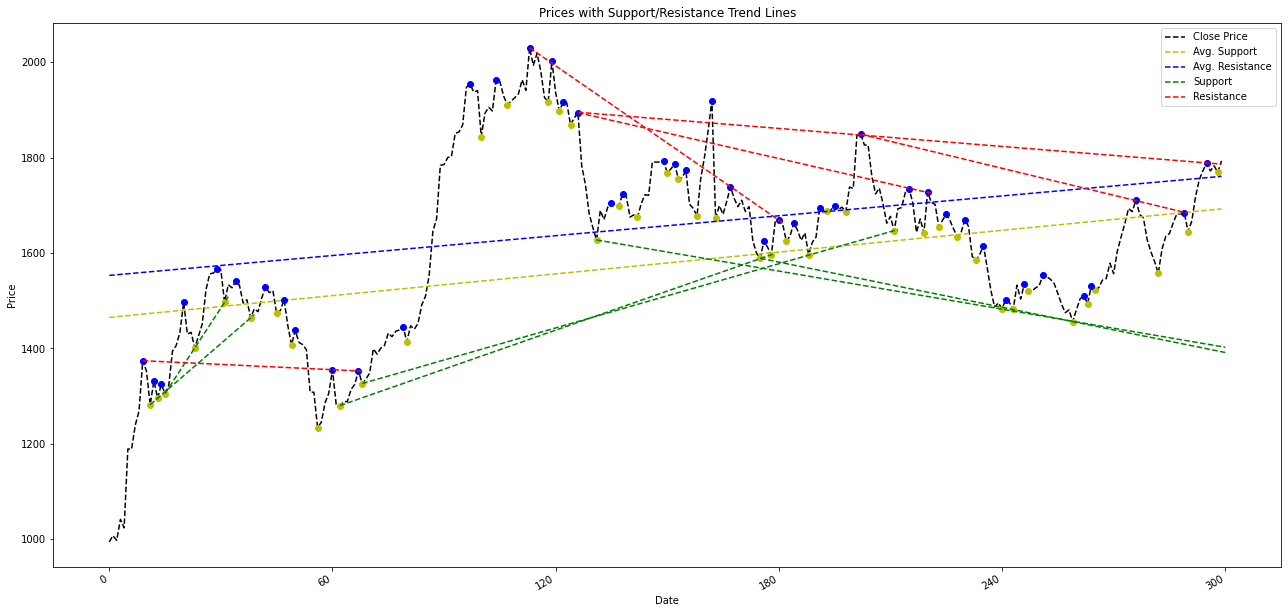

<Figure size 432x288 with 0 Axes>

In [ ]:
# Функция plot_support_resistance будет рассчитывать и строить средние и 2 верхних линии поддержки и сопротивления,
# а также отмечать используемые экстремумы с максимальной длиной истории и другими идентичными аргументами функции расчета.
plt.figure(figsize=(22, 10))
fig = trendln.plot_support_resistance(hist[-300:].Close, #as per h for calc_support_resistance
                                      xformatter = None, #x-axis data formatter turning numeric indexes to display output
                                      # e.g. ticker.FuncFormatter(func) otherwise just display numeric indexes
                                      numbest = 2, #number of best support and best resistance lines to display
                                      fromwindows = True, #draw numbest best from each window, otherwise draw numbest across whole range
                                      pctbound = 0.1, # bound trend line based on this maximum percentage of the data range above the high or below the low
                                      window=125, # место для эксперимента
                                      errpct = 0.005,
                                      hough_prob_iter=10,
                                      sortError=False,
                                      accuracy=2) # requires matplotlib - pip install matplotlib
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure

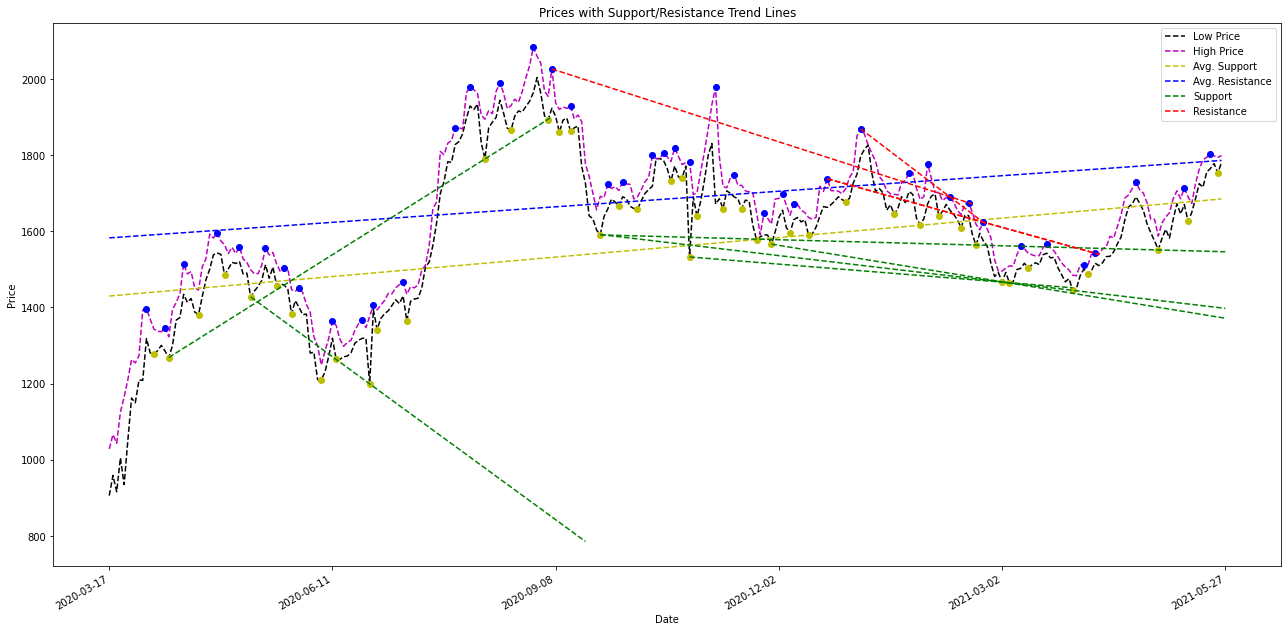

<Figure size 432x288 with 0 Axes>

In [ ]:
# Функция plot_sup_res_date будет делать то же самое, что и plot_support_resistance, с помощью для удобного форматирования дат на основе индекса даты pandas.
plt.figure(figsize=(22, 10))
idx = hist[-300:].index
fig = trendln.plot_sup_res_date((hist[-300:].Low,
                                 hist[-300:].High),
                                idx,
                                accuracy=2) #requires pandas
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure

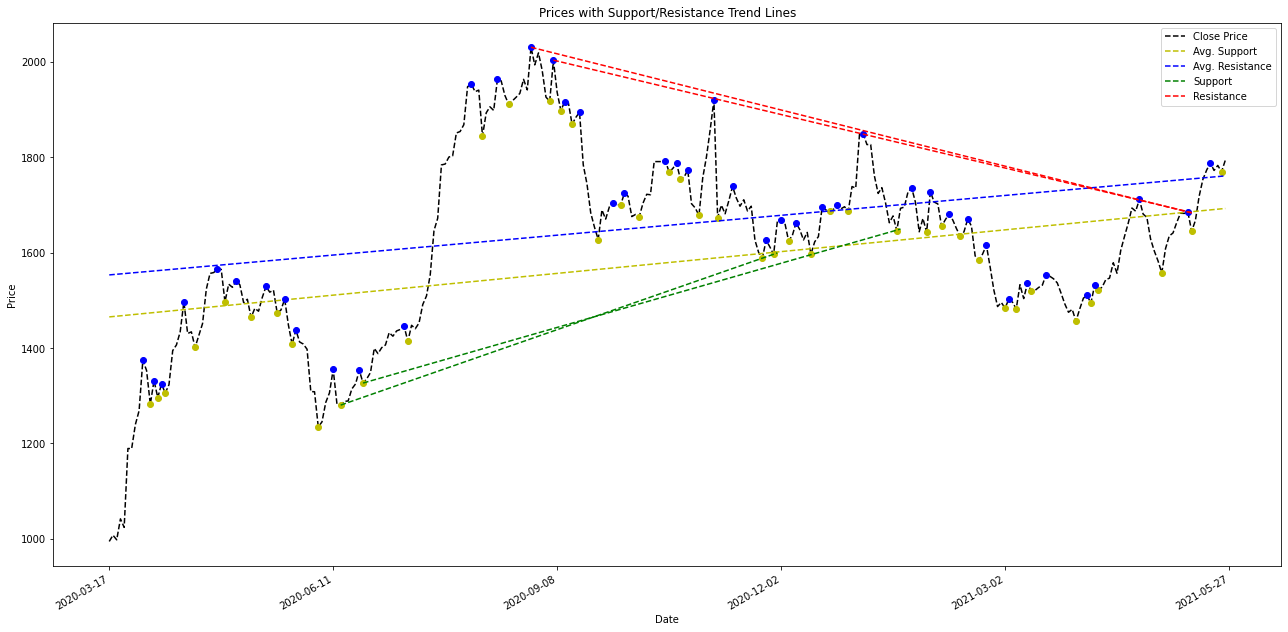

<Figure size 432x288 with 0 Axes>

In [ ]:
hist = hist[-300:]
figure(num=None, figsize=(22, 10), facecolor='w', edgecolor='w')

fig = trendln.plot_sup_res_date(hist.Close,
                                hist.index,
                                window=125,
                                fromwindows = False,
                                accuracy=2)
plt.savefig('support_resistance.svg', format='svg')
plt.show()
plt.clf();

In [ ]:
fig = trendln.plot_sup_res_date( #automatic date formatter based on US trading calendar
	hist, #as per h for calc_support_resistance
	idx, #date index from pandas
	numbest = 2,
	fromwindows = True,
	pctbound = 0.1,
	extmethod = 'METHOD_NUMDIFF',
	method = 'METHOD_NSQUREDLOGN',
	window=125,
	errpct = 0.005,
	hough_scale=0.01,
	hough_prob_iter=10,
	sortError=False,
	accuracy=1)
# other parameters as per plot_support_resistance

ValueError: ignored

IndexError: ignored

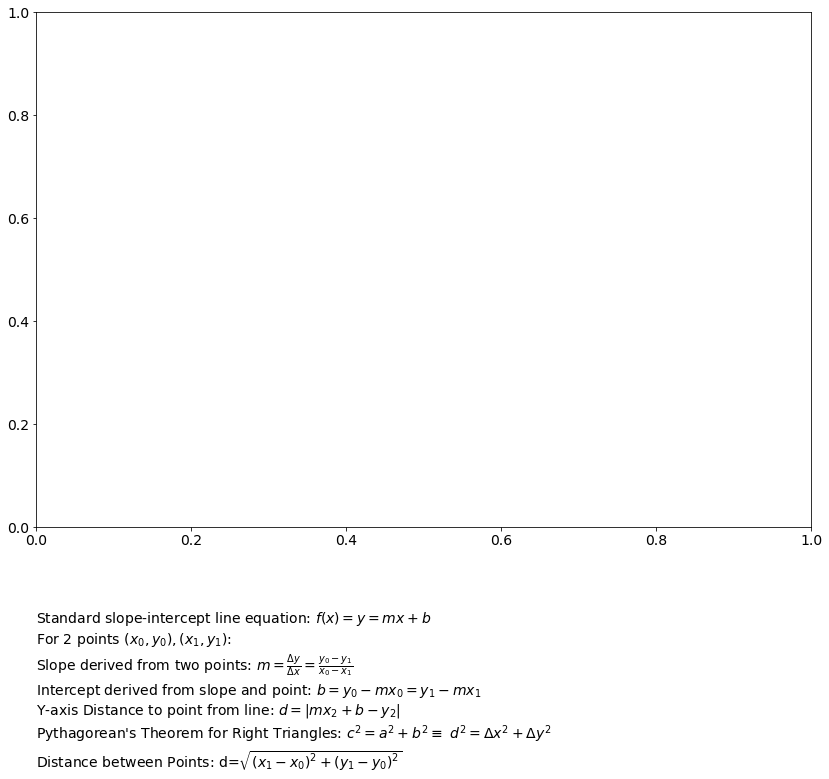

In [ ]:
#Наконец, для вышеупомянутой статьи некоторые рисунки были созданы для справочного материала, 
#в то время как другие используют библиотеку, чтобы продемонстрировать, как она работает.
#Они также могут быть сгенерированы:
trendln.plot_sup_res_learn('.', hist)

In [ ]:
minimaIdxs, maximaIdxs = trendln.get_extrema(hist[-1000:].Close,
                                             accuracy=2)

maximaIdxs = trendln.get_extrema((None, 
                                  hist[-1000:].High),
                                  accuracy=2) #maxima only

minimaIdxs, maximaIdxs = trendln.get_extrema((hist[-1000:].Low,
                                              hist[-1000:].High),
                                              accuracy=2)

# parameters and results are as per defined for calc_support_resistance